In [1]:
import pandas as pd
import numpy as np
import funcy as fy

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

import seaborn as sns
sns.set(context='paper', style='white', font='serif')

In [2]:
from analysis import _savefig

In [3]:
df = pd.read_csv('./data/execution_times.tsv', sep='\t')
df = df.set_index('dataset')
df.head()

,elapsed,iterations,io_time,abz_time,mlblocks_time,primitives_time,btb_time,btb_gp_time
dataset,,,,,,,,
124_214_coil20,3678.052180,15,3.378848,4497.719776,3692.470451,1093.331556,0.156183,0.104174
1491_one_hundred_plants_margin,3717.255577,29,1.240534,3804.934639,3681.185715,3678.539198,0.459230,0.272890
185_baseball,3624.613635,123,3.628708,3635.858096,3264.950767,3262.828107,4.905924,3.274338
196_autoMpg,3621.092361,185,3.260492,3644.611320,3609.968474,3607.421312,4.128752,2.691964
22_handgeometry,3675.512190,15,19.143829,4162.126354,3365.660256,892.668199,0.136764,0.084925


In [4]:
# normalize data.
df['total'] = df['abz_time']
df['mlblocks_time'] = df['mlblocks_time'] - df['primitives_time']
df['btb_time'] = df['btb_time'] - df['btb_gp_time']
df['abz_time'] = df.eval('total - mlblocks_time - primitives_time - btb_time - btb_gp_time - io_time')
df = df.apply(lambda row: row/row['total']*100, axis=1)
df = df[['abz_time', 'io_time', 'mlblocks_time', 'primitives_time', 'btb_time', 'btb_gp_time']]
df.to_csv('./output/execution_time.csv')
df.head()

,abz_time,io_time,mlblocks_time,primitives_time,btb_time,btb_gp_time
dataset,,,,,,
124_214_coil20,17.824905,0.075124,57.787924,24.308574,0.001156,0.002316
1491_one_hundred_plants_margin,3.207655,0.032603,0.069555,96.678118,0.004897,0.007172
185_baseball,9.966635,0.099803,0.058381,89.740249,0.044875,0.090057
196_autoMpg,0.747778,0.089461,0.069888,98.979589,0.039422,0.073861
22_handgeometry,18.672799,0.459953,59.416554,21.447407,0.001245,0.002040


In [5]:
data = (
    df
    .stack()
    .to_frame()
    .reset_index()
    .rename(columns={'level_1': 'time_type', 0: 'time'})
)

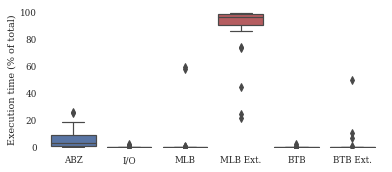

In [6]:
fig, ax = plt.subplots(figsize=(6,2.5))
sns.boxplot(x='time_type', y='time', data=data,ax=ax)
plt.xlabel('')
plt.ylabel('Execution time (% of total)')
ax.set_xticklabels(['ABZ', 'I/O', 'MLB', 'MLB Ext.', 'BTB', 'BTB Ext.'])
ax.set_ylim([0, 100])
sns.despine(left=True, bottom=True)
_savefig(fig, 'execution_time')
ax

In [7]:
summary = data.groupby('time_type').describe()
summary.to_csv('./output/execution_time_summary.csv')
summary

time                                                         \
                count       mean        std        min        25%        50%   
time_type                                                                      
abz_time         59.0   5.664189   6.062949   0.479307   1.039263   3.121628   
btb_gp_time      59.0   1.223472   6.596607   0.000839   0.020985   0.050460   
btb_time         59.0   0.095243   0.315168   0.001141   0.012032   0.022989   
io_time          59.0   0.242526   0.400887   0.023014   0.053081   0.077117   
mlblocks_time    59.0   2.093582  10.678184   0.012239   0.046854   0.066941   
primitives_time  59.0  90.680988  15.372593  21.447407  90.234247  96.150138   

                                       
                       75%        max  
time_type                              
abz_time          9.322672  25.792295  
btb_gp_time       0.121094  49.497301  
btb_time          0.045809   2.243642  
io_time           0.232158   2.280624  
mlblocks_time     0.093718  59.416554  
primitives_time  98.296616  99.002045